In [1]:
import Plots: plot

In [2]:
function expr_to_function_and_string(e::Expr)::Tuple{Expr, String}
    (
        :(x -> $e),
        String(Symbol(e)),
    )
end

expr_to_function_and_string (generic function with 1 method)

In [3]:
let e = :(x + sin(x^2))
    expr_to_function_and_string(e)
end

(:(x->begin
          #= In[2]:3 =#
          x + sin(x ^ 2)
      end), "x + sin(x ^ 2)")

In [4]:
macro curve(e, from, to)
    @assert isa(from, Number)
    @assert isa(to, Number)
    func_expr, expr_str = expr_to_function_and_string(e)
    quote
        plot(
            range($from, $to, length = 1000),
            $func_expr,
            xlabel="x",
            ylabel=$expr_str,
            leg=false,
        )
    end
end

@curve (macro with 1 method)

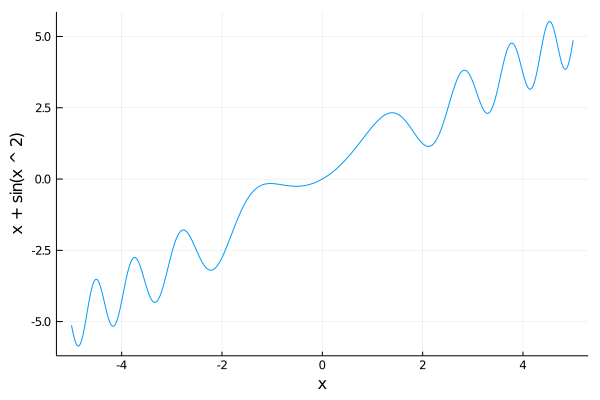

In [5]:
@curve(x + sin(x^2), -5.0, 5.0)

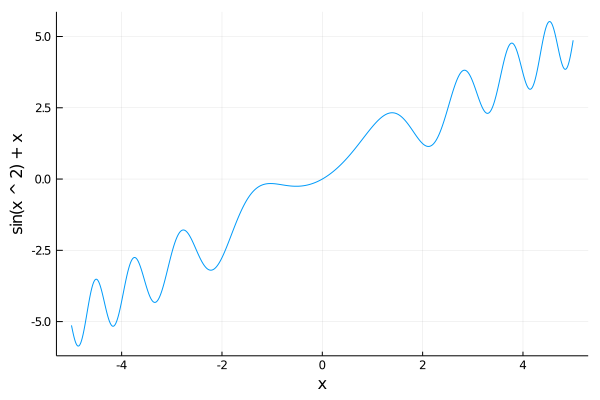

In [6]:
@curve(sin(x^2) + x, -5.0, 5.0)